<a href="https://colab.research.google.com/github/Bjoshua25/HOUSE-PRICES-PREDICTION-RANDOM-FOREST/blob/main/house_prices_prediction_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction | random forests

## Building a random forest regression model

let's **implement** one **using `scikit-learn`**.   

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/house_price_by_area.csv")
df.head()

LotArea  SalePrice
0      138    1204000
1      145    1274000
2      152    1673000
3      152    1232000
4      152    1195600

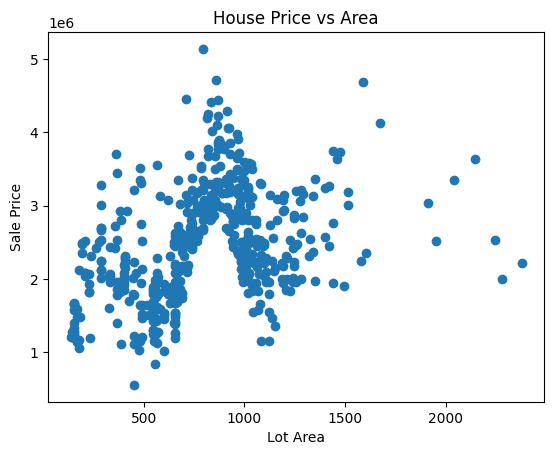

In [3]:
# Plotting the data

X = df["LotArea"] # independent variable
y = df["SalePrice"] # dependent variable

plt.scatter(X,y) # create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

### Preprocessing

In [4]:
# standardise features
scaler = StandardScaler()
# Convert to numpy array first to apply np.newaxis
X_scaled = scaler.fit_transform(np.array(X)[:,np.newaxis])

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

### Training

This process of fitting a decision tree to our data can be done in `scikit-learn` with the ``RandomForestRegressor`` estimator:

As with decision trees, random forests also have hyperparameters. Some of the more important ones include:

- **n_estimators**: The number of trees to include in the forest.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
- **max_depth**: The maximum depth of each forest tree (i.e. the number of nodes between root and leaf node).
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit() – _this particular hyperparameter is important in random forests since their training procedure is inherently random._
- **criterion**: The function to measure the quality of a split. The model uses the mean squared error (MSE) by default.

> To learn more about other RandomForestRegressor hyperparameters, run `help(RandomForestRegressor)` in a new cell.

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

### Testing

To evaluate the performance of our model, we can report the **mean squared error** or **plot** predicted output vs. expected output.

In [6]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 594823.083799867


In [7]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot actual vs. predicted values on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

### Tuning model hyperparameters

In most cases, the default hyperparameter values do not offer the best model performance. In such cases, we have to **tune model hyperparameters** to **yield the best-performing model**.

Let's make some changes to the `n_estimators` parameter and compare the results:

#### Training the various models:

In [8]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [10]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=2, random_state=23)

In [11]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=23)

In [12]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

#### Let's evaluate the models:

We calculate the RMSE for each model and plot the actual vs. predicted values:

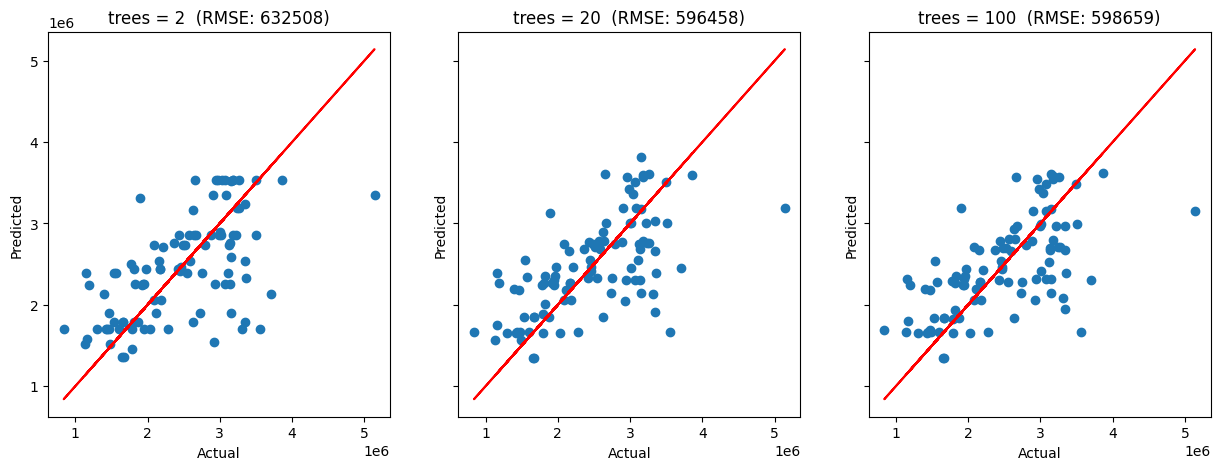

In [13]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

Looking at the RMSEs, the forest with 20 trees performed the best.

> Can you find the optimal parameters (including `max_depth` and `min_samples_leaf`)?

## Assessing variable importance

Knowing the **predictive power** – how different predictive variables affect the model's performance – can prove useful in cases where the dataset is large and high-dimensional.

It allows us to establish **which predictive variables we can discard** without significantly affecting the model's performance. Additionally, models that are presented with fewer predictor variables tend to train faster.  

Unlike decision trees, random forests can be used to calculate a **measure of predictor variable importance**.

One way to compute this measure in the regression setting is to use the training data that was left out when constructing the random forest. Then the variable importance for a given variable can be calculated by:

1. Keeping other variables the same.
2. Shuffling the value of the variable in question.
3. Calculating the percentage increase in MSE.  

This way, **more important variables** will have **higher percentage increases** in the MSE.

In sklearn's `RandomForestRegressor` we can easily obtain variable importances using:
    `model.feature_importances_`